<h2>Data Integration</h2>

<h3>Imports<h3>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
%matplotlib inline
import seaborn as sns
from pathlib import Path
from datetime import date
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import sompy
from sompy.sompy import SOMFactory
from sklearn.decomposition import PCA


<p>Reading the document<p>

In [3]:
#Open Excel files with different extensions
filename = 'train.csv'
file_path = Path(filename)
file_extension = file_path.suffix.lower()[1:]

if file_extension == 'xlsx':
    d = pd.read_excel(file_path, engine='openpyxl')
    data = d.copy()
elif file_extension == 'xls':
    d = pd.read_excel(file_path)
    data = d.copy()
elif file_extension == 'csv':
    d = pd.read_csv(file_path, delimiter=";")
    data = d.copy()
else:
    raise Exception("File not supported")


<h2>Data Access, Exploration and Understanding</h2>

Data Head

In [4]:
data.head()

,Cust_ID,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
0,1,churn,Ms. Nicole Clarke,yes,1974.0,business,single,4907,3,4,...,4,3,4,3,3,3,3,4,3,4
1,2,nochurn,Mr. Jesse Scott,yes,1965.0,business,single,6724,1,1,...,5,3,4,5,5,5,5,1,5,2
2,3,churn,Mr. Christopher Carter,yes,1973.0,business,single,4365,3,3,...,1,4,4,3,3,2,3,2,3,1
3,4,nochurn,Ms. Jennifer Morgan,yes,1993.0,leisure,double,3849,1,1,...,4,4,5,4,4,4,4,4,4,3
4,5,nochurn,Mr. Michael White,yes,1989.0,business,single,5376,2,2,...,5,5,5,5,5,3,4,1,3,5


Data Info

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15589 entries, 0 to 15588
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Cust_ID            15589 non-null  int64  
 1   Churn              15589 non-null  object 
 2   Name               15589 non-null  object 
 3   Longevity          15589 non-null  object 
 4   Year_Birth         15394 non-null  float64
 5   TypeTravel         15589 non-null  object 
 6   RoomType           15589 non-null  object 
 7   RewardPoints       15589 non-null  int64  
 8   Comfort            15589 non-null  int64  
 9   ReceptionSchedule  15589 non-null  int64  
 10  FoodDrink          15589 non-null  int64  
 11  Location           15589 non-null  int64  
 12  Wifi               15589 non-null  int64  
 13  Amenities          15589 non-null  int64  
 14  Staff              15589 non-null  int64  
 15  OnlineBooking      15589 non-null  int64  
 16  PriceQuality       155

Data Shape

In [6]:
data.shape

(15589, 22)

<h4>Looking for Null Values<h4>

<p> By summing the null values for each attribute and then dividing them by the total of values of the same attribute, we will obtain the percentage of null values that each column has. A value different from 0 means that the column has 1 or more missing values, which is not desired. </p>

In [7]:
data.isna().sum()/len(data)*100

Cust_ID              0.000000
Churn                0.000000
Name                 0.000000
Longevity            0.000000
Year_Birth           1.250882
TypeTravel           0.000000
RoomType             0.000000
RewardPoints         0.000000
Comfort              0.000000
ReceptionSchedule    0.000000
FoodDrink            0.000000
Location             0.000000
Wifi                 0.000000
Amenities            0.000000
Staff                0.000000
OnlineBooking        0.000000
PriceQuality         0.000000
RoomSpace            0.000000
CheckOut             0.000000
Checkin              0.000000
Cleanliness          0.000000
BarService           0.000000
dtype: float64

<h4>Checking for duplicate values</h4>

In [8]:
data.duplicated().sum()

0

<p> We conclude that there are no duplicates in our dataset. Hence, no measures have to be taken into action. </p>

<h4> Finding outliers in Year_Birth </h4>

<AxesSubplot:xlabel='Year_Birth', ylabel='Count'>

findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal 700 normal>) = 0.33499999999999996
findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>) = 10.

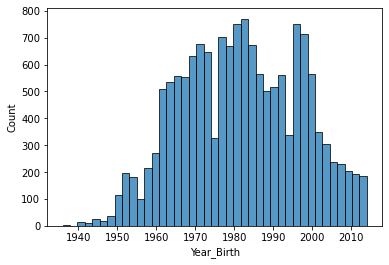

In [9]:
sns.histplot(data=data, x='Year_Birth')

No outliers found.

<h2>Data Preprocessing</h2>

<h4> Power Transformation for Reward Points <h4>

<p>We will now apply a power transformation to make data more Gaussian-like.</p>

<AxesSubplot:xlabel='RewardPoints', ylabel='Count'>

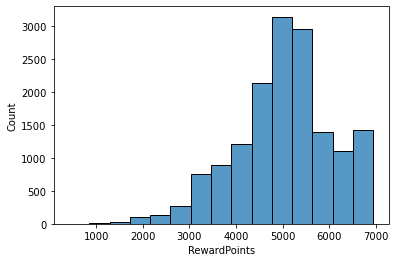

In [10]:
sns.histplot(data=data, x='RewardPoints', bins = 15)

In [11]:
pt = PowerTransformer(method='yeo-johnson', standardize=True)
pt.fit(data["RewardPoints"].values.reshape(-1, 1))
#print(pt.lambdas_)
data['RewardPoints'] = pt.transform(data["RewardPoints"].values.reshape(-1, 1))

<AxesSubplot:xlabel='RewardPoints', ylabel='Count'>

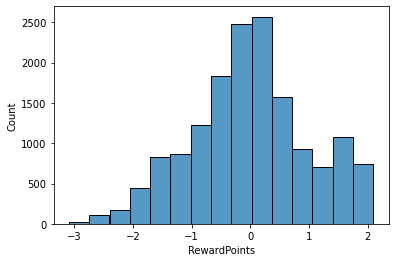

In [12]:
sns.histplot(data=data, x='RewardPoints', bins = 15)

<h4>Using KNN imputer for the missing values in Year_Birth <h4>

In [13]:
# creating an object for KNNImputer
imputer = KNNImputer(n_neighbors=5)

imputer.fit(data['Year_Birth'].values.reshape(-1, 1))
data['Year_Birth'] = imputer.transform(data['Year_Birth'].values.reshape(-1, 1))



In [14]:
data.isna().sum()

Cust_ID              0
Churn                0
Name                 0
Longevity            0
Year_Birth           0
TypeTravel           0
RoomType             0
RewardPoints         0
Comfort              0
ReceptionSchedule    0
FoodDrink            0
Location             0
Wifi                 0
Amenities            0
Staff                0
OnlineBooking        0
PriceQuality         0
RoomSpace            0
CheckOut             0
Checkin              0
Cleanliness          0
BarService           0
dtype: int64

<p> As demonstrated above, our data frame no longer has missing values. They have been imputed as the means of k-Nearest Neighbor values. </p>

<h4>Transform Year_Birth to age</h4>

We will now transform the variable Year_Birth to age. We will not use this new variable in our models, but it will be useful in order to better undestand the charactheristics of the population we are dealing with.

In [15]:
today = date.today()

age = today.year - data['Year_Birth']
print(age)

0        48.0
1        57.0
2        49.0
3        29.0
4        33.0
         ... 
15584    34.0
15585    22.0
15586    58.0
15587    30.0
15588    39.0
Name: Year_Birth, Length: 15589, dtype: float64


Text(0.5, 0, 'Age')

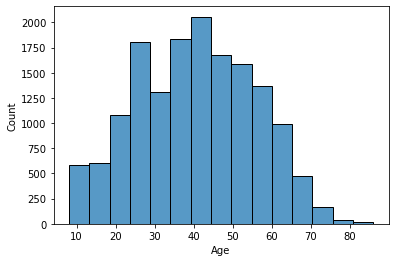

In [16]:
AgePlot = sns.histplot(data=age, x=age, bins = 15)
AgePlot.set_xlabel("Age")

In [17]:
age.mean()

40.293555930882114

We can conclude that the average age of the people in our dataset is around 40 years old. We will now plot the relation between TypeTravel and Year_Birth to check if there are any outliers in that.

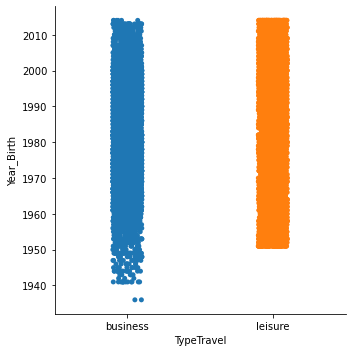

In [18]:
sns.catplot(x="TypeTravel", y = "Year_Birth" , data=data)

It appears that there are two isolated dots from very old people who are still going on business trips. We will consider these outliers and therefore remove them.

In [19]:
data.drop(data[(data['Year_Birth'] < 1937) & (data['TypeTravel'] == "business")].index, inplace = True)

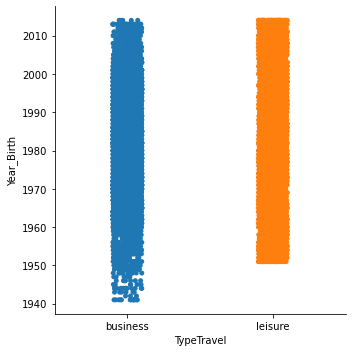

In [20]:
sns.catplot(x="TypeTravel", y = "Year_Birth" , data=data)

<h3>Transform Name in gender </h3>

Since "Name" is not a useful variable for our models, we will transform it to gender. This new variable gives us much better information.

In [21]:
gender = []
for i in data["Name"]:
    if i[:2] == "Mr":
        gender.append(1)
    else:
        gender.append(0)
        i
data["Name"] = gender
data = data.rename(columns = {"Name":"Male"})


<h4>Change Data types</h4>

Replacing the data from longevity to 1 and 0
Yes=1 No=0

In [22]:
data['Longevity'].value_counts()

yes    12546
no      2874
y        167
Name: Longevity, dtype: int64

In [23]:
data['Longevity'].replace(to_replace = 'yes',value = 1, inplace = True)
data['Longevity'].replace(to_replace = 'y',value = 1, inplace = True)
data['Longevity'].replace(to_replace = 'no',value = 0, inplace = True)
data['Longevity'].value_counts()

1    12713
0     2874
Name: Longevity, dtype: int64

<h4>Changing the Values of Column "TypeTravel"</h4>

<p>business = 1 leisure = 0 </p>

In [24]:
data['TypeTravel'].value_counts()

business    10754
leisure      4833
Name: TypeTravel, dtype: int64

In [25]:
data['TypeTravel'].replace(to_replace = 'business',value = 1, inplace = True)
data['TypeTravel'].replace(to_replace = 'leisure',value = 0, inplace = True)
data['TypeTravel'].value_counts()

1    10754
0     4833
Name: TypeTravel, dtype: int64

<h4>Changing the Values of Column "Wifi"</h4>

<p>6 were Replaced by 5 </p>

<AxesSubplot:xlabel='Wifi'>

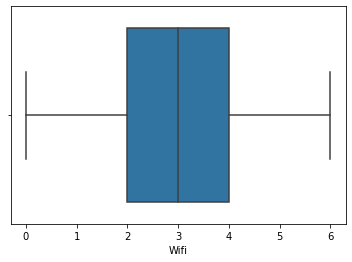

In [26]:
sns.boxplot(x="Wifi", data = data[['Wifi']])

Since the data range goes from 0 to 5, it doesn't make sense to have Wifi evaluated as a 6.

In [27]:
data['Wifi'].value_counts()

4    3704
5    3446
3    3346
2    3245
1    1792
6      36
0      18
Name: Wifi, dtype: int64

In [28]:
data['Wifi'].replace(to_replace = 6,value = 5, inplace = True)
data['Wifi'].value_counts()

4    3704
5    3482
3    3346
2    3245
1    1792
0      18
Name: Wifi, dtype: int64

In [29]:
data['Wifi'].max()

5

Now Wifi is evaluated from 0 to 5, like all the other variables.

<h4>Changing the Values of Column "Churn"</h4>

<p>convert "churn" and "nochurn" to 1 (True) and 0 (False) </p>

In [30]:
data['Churn'].value_counts()

nochurn    8477
churn      7110
Name: Churn, dtype: int64

In [31]:
data['Churn'].replace(to_replace = 'churn',value = 1, inplace = True)
data['Churn'].replace(to_replace = 'nochurn',value = 0, inplace = True)
data['Churn'].value_counts()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15587 entries, 0 to 15588
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Cust_ID            15587 non-null  int64  
 1   Churn              15587 non-null  int64  
 2   Male               15587 non-null  int64  
 3   Longevity          15587 non-null  int64  
 4   Year_Birth         15587 non-null  float64
 5   TypeTravel         15587 non-null  int64  
 6   RoomType           15587 non-null  object 
 7   RewardPoints       15587 non-null  float64
 8   Comfort            15587 non-null  int64  
 9   ReceptionSchedule  15587 non-null  int64  
 10  FoodDrink          15587 non-null  int64  
 11  Location           15587 non-null  int64  
 12  Wifi               15587 non-null  int64  
 13  Amenities          15587 non-null  int64  
 14  Staff              15587 non-null  int64  
 15  OnlineBooking      15587 non-null  int64  
 16  PriceQuality       155

Changing the type of Year_Birth to int32

<p>After applying the power transformation to Year_Birth, some years became non-integer values. Since this does not make sense, we changed the type of this variable to int in order to round those values. </p>

In [32]:
data['Year_Birth']=data['Year_Birth'].astype(int)
data.head(4)

,Cust_ID,Churn,Male,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
0,1,1,0,1,1974,1,single,-0.184038,3,4,...,4,3,4,3,3,3,3,4,3,4
1,2,0,1,1,1965,1,single,1.817457,1,1,...,5,3,4,5,5,5,5,1,5,2
2,3,1,1,1,1973,1,single,-0.700780,3,3,...,1,4,4,3,3,2,3,2,3,1
3,4,0,0,1,1993,0,double,-1.155980,1,1,...,4,4,5,4,4,4,4,4,4,3


<h4>Room Type change</h4>

In [33]:
data['RoomType'].value_counts()

single    7440
double    7021
suite     1126
Name: RoomType, dtype: int64

<h4>Ordinal Encoding for column RoomType</h4>

In [34]:
data['RoomType'].replace(to_replace = 'suite',value = 2, inplace = True)
data['RoomType'].replace(to_replace = 'double',value = 1, inplace = True)
data['RoomType'].replace(to_replace = 'single',value = 0, inplace = True)
data['RoomType'].value_counts()

0    7440
1    7021
2    1126
Name: RoomType, dtype: int64

<h4>Pearson Correlation Heatmap</h4>

locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001E52E923D60>
Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001E52E923D60> on colorbar
Setting pcolormesh


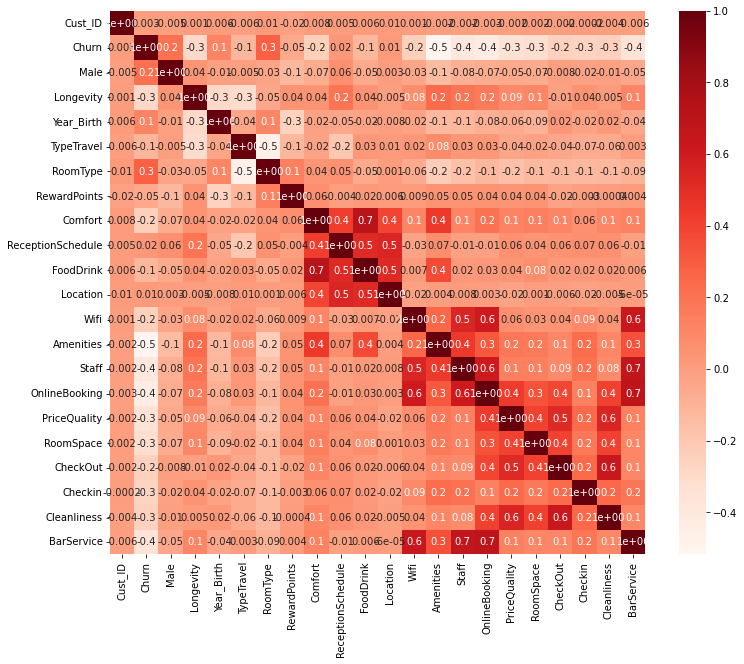

In [35]:
#Pearson correlation
cor_pearson= data.corr(method ='pearson')
#Heatmap function defined
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()
#print correlation
cor_heatmap(cor_pearson)

<h4>Feature Selection</h4>

<p>With the correlation map we were able see which features had a greater impact on the outcome (Churn) and which ones didn't. It also allowed us to see that there are some features that have a high correlation between them. </p>

In [36]:
unscaled_data = data.copy()

In [37]:
data.drop(columns=['Cust_ID'], inplace=True)

<h4>Scaling<h4>

<p>Since variables that are measured at different scales do not contribute equally to the model fitting and model learned function and might end up creating a bias, we will deal with this potential problem by applying a MinMax Normalization.</p>

In [38]:
scaler = RobustScaler().fit(data)
robust_data = scaler.transform(data)

data = pd.DataFrame(robust_data, columns = data.columns)
data.head()

,Churn,Male,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
0,1.0,0.0,0.0,-0.291667,0.0,-1.0,-0.149580,0.0,0.5,-1.0,...,0.5,-0.5,0.0,-0.333333,-1.0,-0.333333,-0.5,1.0,-0.5,0.5
1,0.0,1.0,0.0,-0.666667,0.0,-1.0,1.503639,-1.0,-1.0,-1.0,...,1.0,-0.5,0.0,0.333333,1.0,0.333333,0.5,-2.0,0.5,-0.5
2,1.0,1.0,0.0,-0.333333,0.0,-1.0,-0.576405,0.0,0.0,0.0,...,-1.0,0.0,0.0,-0.333333,-1.0,-0.666667,-0.5,-1.0,-0.5,-1.0
3,0.0,0.0,0.0,0.500000,-1.0,0.0,-0.952397,-1.0,-1.0,-1.0,...,0.5,0.0,0.5,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.333333,0.0,-1.0,0.245099,-0.5,-0.5,0.0,...,1.0,0.5,0.5,0.333333,1.0,-0.333333,0.0,-2.0,-0.5,1.0


<h4>PCA</h4>

Principal component analysis, or PCA, is a statistical technique to convert high dimensional data to low dimensional data by selecting the most important features that capture maximum information about the dataset.

In [39]:
pca = PCA().fit(data)
data_PCA = pca.transform(data)

data = pd.DataFrame(data_PCA, columns = data.columns)
data.head()

,Churn,Male,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
0,0.041794,-0.031565,0.970222,-0.164149,0.118274,0.201140,-0.982321,-0.233688,0.420330,0.305009,...,0.376163,-0.189108,0.039969,0.337264,0.276964,-0.083976,0.291342,-0.856947,-0.369638,-0.239034
1,-0.072273,1.703888,-2.780070,-1.638305,-1.264056,-0.544893,-0.556562,-0.482925,-0.582980,-0.323158,...,0.358491,0.602844,-0.309935,-0.352847,0.638101,0.215950,-0.116040,0.298132,0.094816,0.084835
2,1.480827,-0.258499,-0.732606,0.369983,0.515288,-1.182800,-0.531339,0.476847,-0.007549,-0.019864,...,-0.611820,-0.477372,-0.293278,-0.235679,0.542267,-0.111732,0.468226,-0.096995,-0.253024,0.385383
3,-0.774233,1.829115,0.437137,-0.709931,0.669832,0.316594,0.707702,0.893250,-0.081621,0.677563,...,-0.036951,0.245971,-0.323139,-0.485771,0.369787,0.012362,0.037994,0.122352,0.230707,0.102045
4,-0.306758,0.145185,-2.272320,-2.324787,0.312491,-0.314485,-0.047968,0.025274,0.633232,-0.038269,...,-0.166864,0.112264,-0.263479,0.041280,-0.127154,-0.247606,-0.408966,0.305454,0.050022,-0.001909


<h4> Perspectives </h4>

In [40]:
data_satisfaction = data[['Comfort','ReceptionSchedule','FoodDrink','Location','Wifi','Amenities','Staff','OnlineBooking','PriceQuality','RoomSpace','CheckOut','Checkin','Cleanliness','BarService']].copy()
data_satisfaction

,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
0,-0.233688,0.420330,0.305009,-0.324052,0.376163,-0.189108,0.039969,0.337264,0.276964,-0.083976,0.291342,-0.856947,-0.369638,-0.239034
1,-0.482925,-0.582980,-0.323158,0.609036,0.358491,0.602844,-0.309935,-0.352847,0.638101,0.215950,-0.116040,0.298132,0.094816,0.084835
2,0.476847,-0.007549,-0.019864,0.441467,-0.611820,-0.477372,-0.293278,-0.235679,0.542267,-0.111732,0.468226,-0.096995,-0.253024,0.385383
3,0.893250,-0.081621,0.677563,-0.215102,-0.036951,0.245971,-0.323139,-0.485771,0.369787,0.012362,0.037994,0.122352,0.230707,0.102045
4,0.025274,0.633232,-0.038269,0.968004,-0.166864,0.112264,-0.263479,0.041280,-0.127154,-0.247606,-0.408966,0.305454,0.050022,-0.001909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15582,-0.144386,1.073263,-0.401620,-0.779494,-0.216688,-0.384355,0.321926,-0.800049,-0.107072,1.046962,0.339580,-0.271254,0.176686,-0.106055
15583,-0.740453,0.686125,-0.176439,-0.223737,0.309258,-0.850050,-0.373844,0.117193,-0.095816,0.193071,0.466605,0.160774,-0.033809,0.222669
15584,0.602936,-0.274225,-0.221795,0.070262,-0.423275,-0.169976,0.108860,-0.051536,0.082071,0.098193,-0.017161,0.212991,0.050353,0.024737
15585,-0.226364,-0.876113,-0.111789,0.179651,-0.517615,0.654104,0.231546,-0.402571,-0.085493,0.005966,-0.130480,0.003536,0.265799,0.055498


In [41]:
data_customer = data[['Male','Longevity','Year_Birth','TypeTravel','RewardPoints', 'RoomType', 'Churn']].copy()
data_customer

,Male,Longevity,Year_Birth,TypeTravel,RewardPoints,RoomType,Churn
0,-0.031565,0.970222,-0.164149,0.118274,-0.982321,0.201140,0.041794
1,1.703888,-2.780070,-1.638305,-1.264056,-0.556562,-0.544893,-0.072273
2,-0.258499,-0.732606,0.369983,0.515288,-0.531339,-1.182800,1.480827
3,1.829115,0.437137,-0.709931,0.669832,0.707702,0.316594,-0.774233
4,0.145185,-2.272320,-2.324787,0.312491,-0.047968,-0.314485,-0.306758
...,...,...,...,...,...,...,...
15582,1.517400,-0.387780,-0.294959,-0.032988,0.659518,-0.060721,0.539712
15583,-0.184865,1.057021,-0.815352,0.384192,0.570391,1.065268,-0.166229
15584,1.966260,1.193152,-0.580428,0.543574,-0.675378,-0.751052,-1.448620
15585,-1.398200,0.715758,-1.317425,0.172743,0.515796,0.839220,0.317981


<h3>Modelling</h3>

<h4>K-Means</h4>

<h4> Elbow Method </h4>

In [42]:
ks = range(1, 8)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)

    # Fit model to samples
    model.fit(data_satisfaction)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

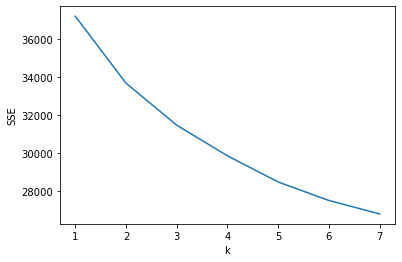

In [43]:
# Plot ks (x-axis) vs inertias (y-axis) using plt.plot(). 
plt.plot(ks, inertias)
# define the label for x axis as 'k' using matplotlib.pyplot.xlabel
plt.xlabel('k')
# define the label for y axis as 'SSE' using matplotlib.pyplot.ylabel
plt.ylabel('SSE')
# define the ticks in x axis using the values of ks
plt.xticks(ks)
# call plt.show()
plt.show()

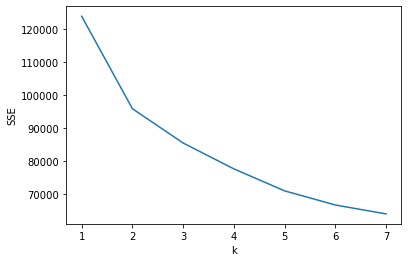

In [44]:
ks = range(1, 8)
inertias = []

for k in ks:
    
    model = KMeans(n_clusters=k)

    
    model.fit(data_customer)

    
    inertias.append(model.inertia_)


plt.plot(ks, inertias)
plt.xlabel('k')
plt.ylabel('SSE')
plt.xticks(ks)
plt.show()

<h4>Dendogram</h4>

In [45]:
#hclustering = linkage(data_satisfaction, 'complete') 
#hclustering = linkage(data_satisfaction, 'average')
#hclustering = linkage(data_satisfaction, 'single')
hclustering = linkage(data_customer, 'ward')

findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal 700 normal>) = 0.33499999999999996
findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>) = 10.

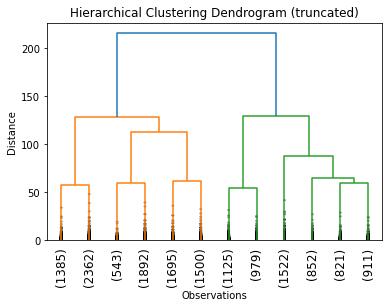

In [46]:
# define the title of the plot
plt.title('Hierarchical Clustering Dendrogram (truncated)')
# define the label for x axis
plt.xlabel('Observations')
# define the label for y axis
plt.ylabel('Distance')

# Draw the dendogram
dendrogram(
    hclustering,
    truncate_mode='lastp',  # truncation is used to condense the dendrogram
    p=12,                   # p parameter for truncate_mode
    show_leaf_counts=True,  # number of observations each leaf node contains in parentheses
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True, 
)
plt.show()

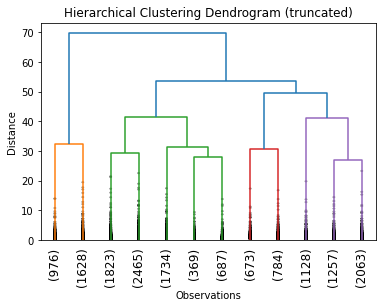

In [47]:
hclustering = linkage(data_satisfaction, 'ward')

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Observations')
plt.ylabel('Distance')

dendrogram(
    hclustering,
    truncate_mode='lastp',  # truncation is used to condense the dendrogram
    p=12,                   # p parameter for truncate_mode
    show_leaf_counts=True,  # number of observations each leaf node contains in parentheses
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True, 
)
plt.show()

<h4> Applying K-Means </h4>

In [48]:
model_KMeans_satisfaction = KMeans(n_clusters=2)

model_KMeans_satisfaction.fit(data_satisfaction)

KMeans(n_clusters=2)

In [49]:
model_KMeans_customer = KMeans(n_clusters=3)

model_KMeans_customer.fit(data_customer)

KMeans(n_clusters=3)

In [50]:
model_KMeans_satisfaction.cluster_centers_

array([[ 4.42120522e-01, -4.28898222e-02,  1.69283533e-02,
        -5.79864549e-02, -1.84301654e-02,  1.15059367e-02,
        -6.23950190e-03, -5.28407334e-04,  1.50148793e-05,
        -4.48445403e-03,  4.43417910e-03, -6.50034258e-03,
         3.65845932e-03,  2.42455181e-03],
       [-4.94965768e-01,  4.80163048e-02, -1.89517450e-02,
         6.49173896e-02,  2.06330639e-02, -1.28812044e-02,
         6.98528952e-03,  5.91566166e-04, -1.68095596e-05,
         5.02046641e-03, -4.96418228e-03,  7.27730765e-03,
        -4.09574321e-03, -2.71435070e-03]])

In [51]:
model_KMeans_customer.cluster_centers_

array([[-0.85014818, -0.06311397,  0.13418453,  0.03049061,  0.03508164,
        -0.02519127, -1.21049402],
       [-0.16777224,  0.02985123, -0.03266046, -0.01922423,  0.00726152,
        -0.01921038,  1.77412568],
       [ 1.18342496,  0.03789872, -0.11695143, -0.01263744, -0.04923395,
         0.05188085, -0.69201724]])

In [52]:
data_satisfaction['label'] = model_KMeans_satisfaction.labels_
data_satisfaction

,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,label
0,-0.233688,0.420330,0.305009,-0.324052,0.376163,-0.189108,0.039969,0.337264,0.276964,-0.083976,0.291342,-0.856947,-0.369638,-0.239034,1
1,-0.482925,-0.582980,-0.323158,0.609036,0.358491,0.602844,-0.309935,-0.352847,0.638101,0.215950,-0.116040,0.298132,0.094816,0.084835,1
2,0.476847,-0.007549,-0.019864,0.441467,-0.611820,-0.477372,-0.293278,-0.235679,0.542267,-0.111732,0.468226,-0.096995,-0.253024,0.385383,0
3,0.893250,-0.081621,0.677563,-0.215102,-0.036951,0.245971,-0.323139,-0.485771,0.369787,0.012362,0.037994,0.122352,0.230707,0.102045,0
4,0.025274,0.633232,-0.038269,0.968004,-0.166864,0.112264,-0.263479,0.041280,-0.127154,-0.247606,-0.408966,0.305454,0.050022,-0.001909,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15582,-0.144386,1.073263,-0.401620,-0.779494,-0.216688,-0.384355,0.321926,-0.800049,-0.107072,1.046962,0.339580,-0.271254,0.176686,-0.106055,1
15583,-0.740453,0.686125,-0.176439,-0.223737,0.309258,-0.850050,-0.373844,0.117193,-0.095816,0.193071,0.466605,0.160774,-0.033809,0.222669,1
15584,0.602936,-0.274225,-0.221795,0.070262,-0.423275,-0.169976,0.108860,-0.051536,0.082071,0.098193,-0.017161,0.212991,0.050353,0.024737,0
15585,-0.226364,-0.876113,-0.111789,0.179651,-0.517615,0.654104,0.231546,-0.402571,-0.085493,0.005966,-0.130480,0.003536,0.265799,0.055498,1


In [53]:
data_customer['label'] = model_KMeans_customer.labels_
data_customer

,Male,Longevity,Year_Birth,TypeTravel,RewardPoints,RoomType,Churn,label
0,-0.031565,0.970222,-0.164149,0.118274,-0.982321,0.201140,0.041794,2
1,1.703888,-2.780070,-1.638305,-1.264056,-0.556562,-0.544893,-0.072273,2
2,-0.258499,-0.732606,0.369983,0.515288,-0.531339,-1.182800,1.480827,1
3,1.829115,0.437137,-0.709931,0.669832,0.707702,0.316594,-0.774233,2
4,0.145185,-2.272320,-2.324787,0.312491,-0.047968,-0.314485,-0.306758,2
...,...,...,...,...,...,...,...,...
15582,1.517400,-0.387780,-0.294959,-0.032988,0.659518,-0.060721,0.539712,2
15583,-0.184865,1.057021,-0.815352,0.384192,0.570391,1.065268,-0.166229,2
15584,1.966260,1.193152,-0.580428,0.543574,-0.675378,-0.751052,-1.448620,2
15585,-1.398200,0.715758,-1.317425,0.172743,0.515796,0.839220,0.317981,0


<h2> Assessment </h2>

In [54]:
descr_satisfaction = data_satisfaction.groupby(['label']).describe().transpose()
descr_satisfaction

label                       0            1
Comfort    count  8213.000000  7374.000000
           mean      0.443255    -0.493688
           std       0.356312     0.373612
           min      -0.276562    -2.372312
           25%       0.171492    -0.716439
...                       ...          ...
BarService min      -1.300609    -1.123953
           25%      -0.130887    -0.124061
           50%      -0.006952    -0.009988
           75%       0.132622     0.111235
           max       1.316100     0.854084

[112 rows x 2 columns]

In [55]:
descr_customer = data_customer.groupby(['label']).describe().transpose()
descr_customer

label                         0            1            2
Male         count  5410.000000  5508.000000  4669.000000
             mean     -0.850015    -0.167867     1.182949
             std       0.706232     0.985747     0.648354
             min      -2.862639    -3.213199    -0.278976
             25%      -1.383731    -0.852874     0.686638
             50%      -0.814862    -0.135099     1.088361
             75%      -0.255394     0.542757     1.680015
             max       0.667854     2.758556     3.664699
Longevity    count  5410.000000  5508.000000  4669.000000
             mean     -0.063027     0.029374     0.038377
             std       1.053009     1.297057     1.022757
             min      -3.388172    -3.335505    -3.331588
             25%      -0.687725    -0.880594    -0.583349
             50%       0.026113    -0.042908     0.100002
             75%       0.718966     0.989228     0.727904
             max       3.221324     3.556383     3.201451
Year_Birth   count  5410.000000  5508.000000  4669.000000
             mean      0.134529    -0.033034    -0.116910
             std       0.868233     1.091771     1.112135
             min      -2.281136    -3.038629    -2.788806
             25%      -0.446342    -0.806860    -0.918954
             50%       0.027031    -0.034537    -0.382799
             75%       0.590927     0.745003     0.547876
             max       3.237272     2.831946     3.328995
TypeTravel   count  5410.000000  5508.000000  4669.000000
             mean      0.030590    -0.019790    -0.012099
             std       0.913817     0.839103     0.847839
             min      -2.235932    -2.277096    -2.306112
             25%      -0.629557    -0.502175    -0.525686
             50%       0.071534    -0.002982     0.025341
             75%       0.642524     0.471418     0.518425
             max       2.585923     2.528901     2.532702
RewardPoints count  5410.000000  5508.000000  4669.000000
             mean      0.035118     0.007132    -0.049105
             std       0.611640     0.709537     0.642629
             min      -1.676176    -2.366067    -2.372162
             25%      -0.419010    -0.485399    -0.430536
             50%      -0.071642     0.008025    -0.098453
             75%       0.443025     0.493615     0.291255
             max       2.401549     2.785763     2.363414
RoomType     count  5410.000000  5508.000000  4669.000000
             mean     -0.025138    -0.019110     0.051671
             std       0.646106     0.715117     0.854479
             min      -2.303690    -2.538080    -2.328743
             25%      -0.472328    -0.524843    -0.592586
             50%      -0.092367    -0.081081    -0.146972
             75%       0.384919     0.430009     0.585512
             max       2.438355     3.005180     3.109242
Churn        count  5410.000000  5508.000000  4669.000000
             mean     -1.210215     1.774935    -0.691600
             std       0.874134     0.873461     0.884452
             min      -3.299823     0.175034    -2.912735
             25%      -1.864736     1.081249    -1.366658
             50%      -1.181699     1.662944    -0.632050
             75%      -0.565564     2.390081    -0.006449
             max       0.702209     4.738217     1.666893

<h3>Visualizing the results </h3>

In [56]:
cluster0_satisfaction = data_satisfaction[data_satisfaction.label==0]
cluster1_satisfaction = data_satisfaction[data_satisfaction.label==1]

In [57]:
cluster0_customer = data_customer[data_customer.label==0]
cluster1_customer = data_customer[data_customer.label==1]
cluster2_customer = data_customer[data_customer.label==2]

c:\Users\manue\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


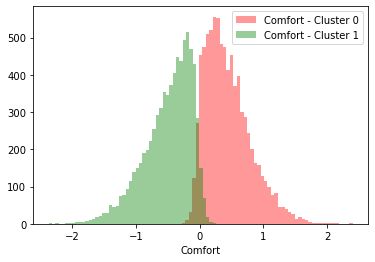

In [58]:
sns.distplot(cluster0_satisfaction['Comfort'],color='red',label='Comfort - Cluster 0', kde = False)
sns.distplot(cluster1_satisfaction['Comfort'],color='green',label='Comfort - Cluster 1', kde = False)
plt.legend()

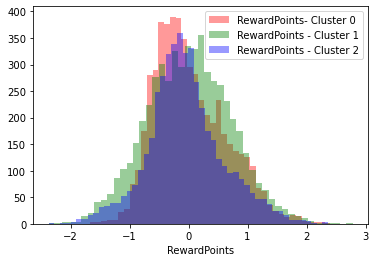

In [59]:
sns.distplot(cluster0_customer['RewardPoints'],color='red',label='RewardPoints- Cluster 0', kde = False)
sns.distplot(cluster1_customer['RewardPoints'],color='green',label='RewardPoints - Cluster 1', kde = False)
sns.distplot(cluster2_customer['RewardPoints'],color='blue',label='RewardPoints - Cluster 2', kde = False)
plt.legend()

<h2>SOM Data Satisfaction</h2>

In [60]:
df_som = np.float32(data_satisfaction.values)

In [61]:
rows = 20
cols = 20
mapsize = [rows, cols]

In [62]:
som = SOMFactory().build(df_som, mapsize, mask=None, 
                         mapshape='planar', # 2Dimensions
                         lattice='rect', # topology: 'rect' or 'hexa'
                         normalization='var', # standardize the variables
                         initialization='pca', # initialization of the weights: 'pca' or 'random'
                         neighborhood='gaussian', # neighborhood function: 'gaussian' or 'bubble'
                         training='batch') # training mode: 'seq' or 'batch'

In [63]:
som.train(n_job=1, verbose=False, train_rough_len=3, train_finetune_len=5)

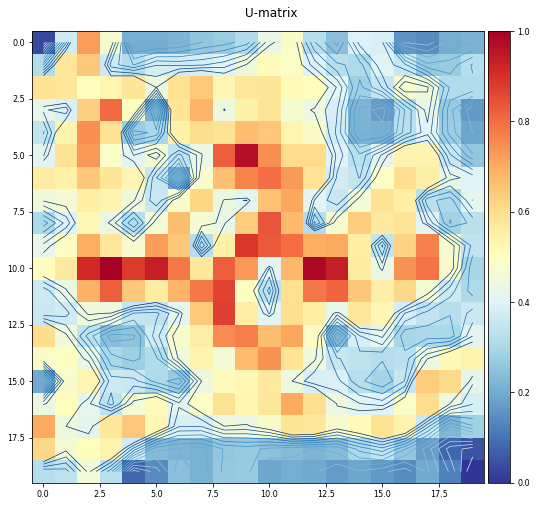

In [64]:
u = sompy.umatrix.UMatrixView(rows, cols, title='U-matrix', show_axis=True, text_size=8, show_text=True)

#This is the Umat value
UMAT  = u.build_u_matrix(som, distance=1, row_normalized=False)

#Here you have Umatrix plus its render
_, umat = u.show(som, distance=1, row_normalized=True, contour=True, blob=False)

c:\Users\manue\anaconda3\lib\site-packages\sompy\visualization\mapview.py:139: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = self._fig.add_subplot(no_row_in_plot, no_col_in_plot,


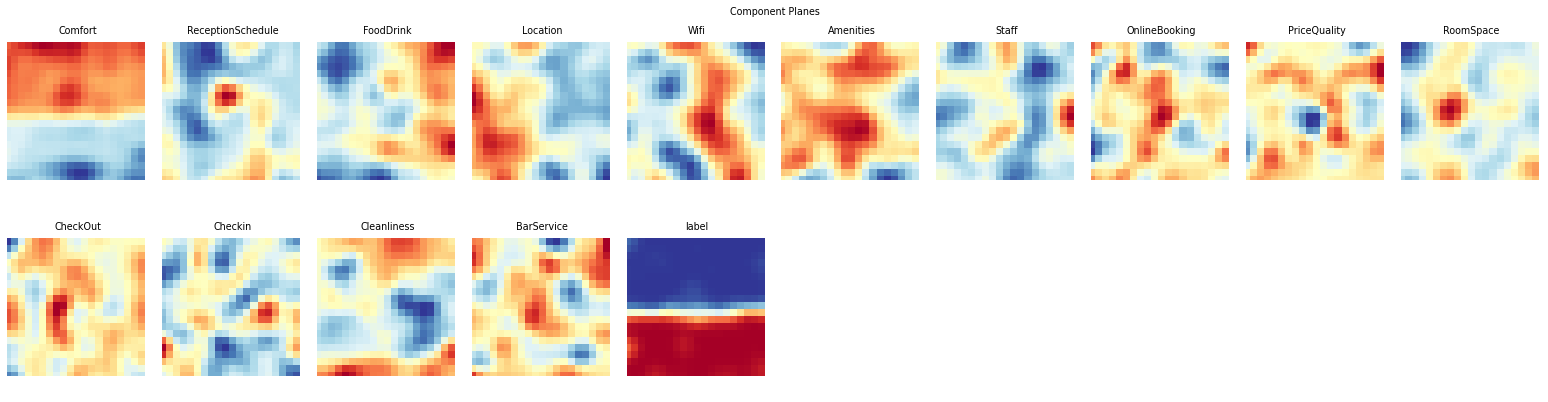

In [65]:
som.component_names = data_satisfaction.columns
comp_planes = sompy.mapview.View2DPacked(rows, cols, "Component Planes", text_size=8)  
comp_planes.show(som, what='codebook', which_dim='all', col_sz=10) #which_dim='all' default

In [66]:
bmus = som.project_data(df_som)
bmus

array([295, 323, 119, ..., 106, 265, 123])

In [67]:
cl = som.cluster(n_clusters=2)

In [68]:
labels = getattr(som, 'cluster_labels')
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

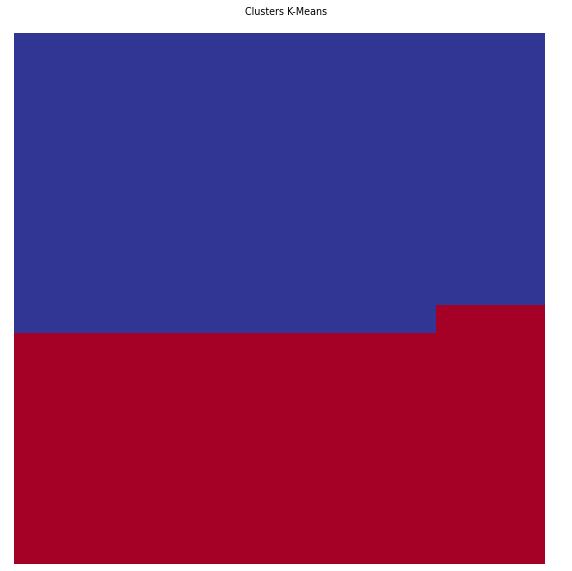

In [69]:
v = sompy.mapview.View2DPacked(width=10, height=10, title='Clusters K-Means', text_size=8) 
v.show(som, what='cluster')

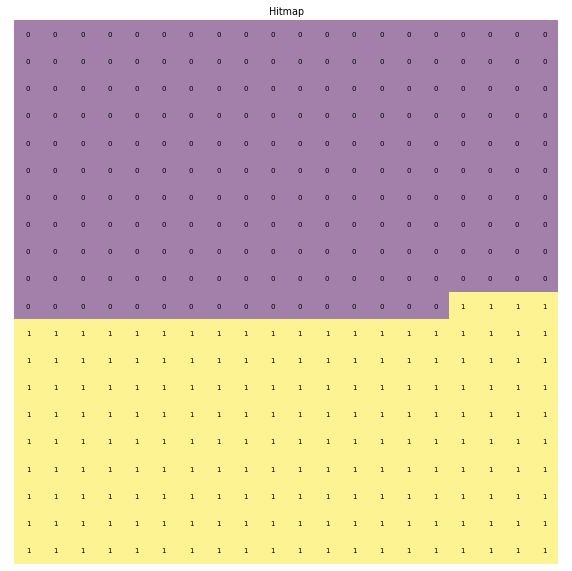

In [70]:
h = sompy.hitmap.HitMapView(10, 10, 'Hitmap', text_size=8, show_text=True)
h.show(som)

In [71]:
bmus = som.project_data(df_som)
data_satisfaction['bmu'] = bmus

In [72]:
data_satisfaction['label'] = labels[data_satisfaction['bmu']]
data_satisfaction.head(10)

,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,label,bmu
0,-0.233688,0.420330,0.305009,-0.324052,0.376163,-0.189108,0.039969,0.337264,0.276964,-0.083976,0.291342,-0.856947,-0.369638,-0.239034,1,295
1,-0.482925,-0.582980,-0.323158,0.609036,0.358491,0.602844,-0.309935,-0.352847,0.638101,0.215950,-0.116040,0.298132,0.094816,0.084835,1,323
2,0.476847,-0.007549,-0.019864,0.441467,-0.611820,-0.477372,-0.293278,-0.235679,0.542267,-0.111732,0.468226,-0.096995,-0.253024,0.385383,0,119
3,0.893250,-0.081621,0.677563,-0.215102,-0.036951,0.245971,-0.323139,-0.485771,0.369787,0.012362,0.037994,0.122352,0.230707,0.102045,0,77
4,0.025274,0.633232,-0.038269,0.968004,-0.166864,0.112264,-0.263479,0.041280,-0.127154,-0.247606,-0.408966,0.305454,0.050022,-0.001909,1,321
5,-0.267892,0.880204,-0.384508,-1.058015,0.030498,0.522537,-0.610214,-0.675788,-0.102558,-0.109132,-0.142245,0.511186,-0.468309,0.143166,1,234
6,-0.477486,0.110748,0.161250,-0.512743,0.114931,-0.337669,-0.215623,0.348208,-0.069200,0.265607,0.408757,0.062950,0.200992,0.206979,1,359
7,0.527309,0.129007,0.174204,0.495019,-0.475491,-0.240665,-0.193487,-0.402875,0.237736,0.136950,-0.054082,-0.196366,-0.048020,0.034508,0,120
8,0.360688,0.342168,-0.333629,0.173679,0.130965,0.124890,-0.113562,-0.124536,0.130886,-0.247080,0.334230,0.224414,-0.130339,0.285829,0,61
9,-0.324785,0.172936,0.024282,0.440185,-0.147674,-0.033781,-0.371431,-0.256374,-0.274205,-0.099890,-0.072201,0.100995,-0.218643,-0.162896,1,281


In [73]:
df_final = data.copy(deep=True)
df_final['label'] = data_satisfaction['label']

descr = df_final.reset_index(drop=True)
descr = descr.groupby(['label'])[['Comfort','ReceptionSchedule','FoodDrink','Location','Wifi','Amenities','Staff','OnlineBooking','PriceQuality','RoomSpace','CheckOut','Checkin','Cleanliness','BarService']].describe().T
descr

label                       0            1
Comfort    count  8278.000000  7309.000000
           mean      0.431452    -0.488652
           std       0.368531     0.383054
           min      -1.089008    -2.372312
           25%       0.160354    -0.717231
...                       ...          ...
BarService min      -1.300609    -1.123953
           25%      -0.130713    -0.123866
           50%      -0.006816    -0.010331
           75%       0.134424     0.109216
           max       1.316100     0.854084

[112 rows x 2 columns]

<h2>SOM Data customer</h2>

In [74]:
df_som_customer = np.float32(data_customer.values)

In [75]:
rows = 20
cols = 20
mapsize = [rows, cols]

In [76]:
som = SOMFactory().build(df_som_customer, mapsize, mask=None, 
                         mapshape='planar', # 2Dimensions
                         lattice='rect', # topology: 'rect' or 'hexa'
                         normalization='var', # standardize the variables
                         initialization='pca', # initialization of the weights: 'pca' or 'random'
                         neighborhood='gaussian', # neighborhood function: 'gaussian' or 'bubble'
                         training='batch') # training mode: 'seq' or 'batch'

In [77]:
som.train(n_job=1, verbose=False, train_rough_len=3, train_finetune_len=5)

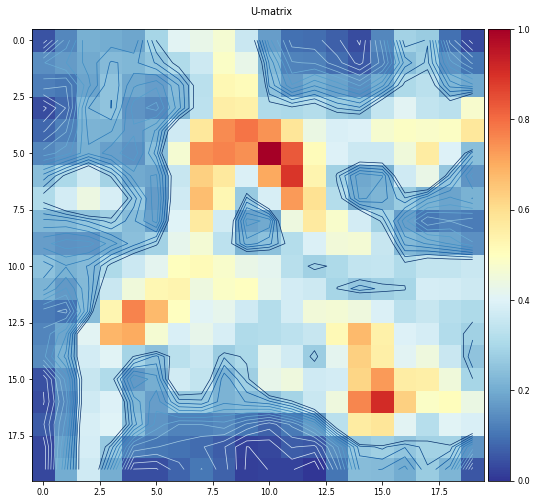

In [78]:
u = sompy.umatrix.UMatrixView(rows, cols, title='U-matrix', show_axis=True, text_size=8, show_text=True)

#This is the Umat value
UMAT  = u.build_u_matrix(som, distance=1, row_normalized=False)

#Here you have Umatrix plus its render
_, umat = u.show(som, distance=1, row_normalized=True, contour=True, blob=False)

c:\Users\manue\anaconda3\lib\site-packages\sompy\visualization\mapview.py:139: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = self._fig.add_subplot(no_row_in_plot, no_col_in_plot,


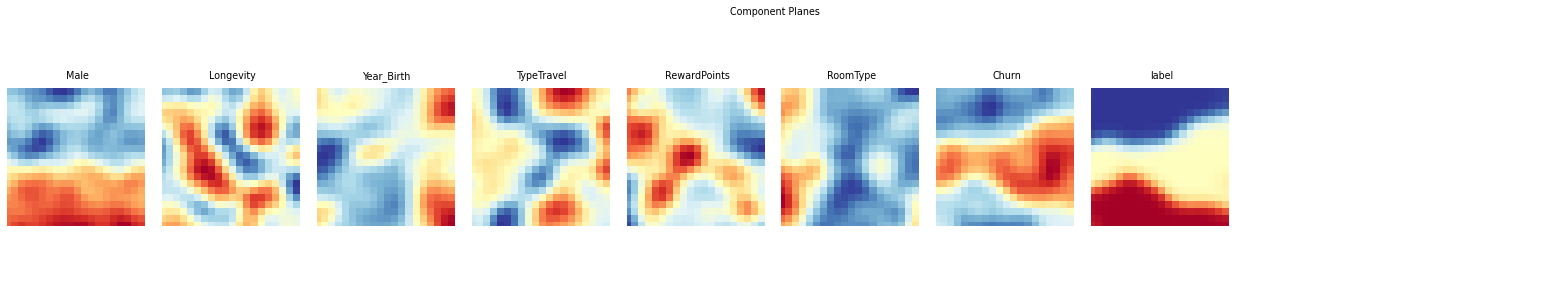

In [79]:
som.component_names = data_customer.columns
comp_planes = sompy.mapview.View2DPacked(rows, cols, "Component Planes", text_size=8)  
comp_planes.show(som, what='codebook', which_dim='all', col_sz=10) #which_dim='all' default

In [80]:
bmus = som.project_data(df_som_customer)
bmus

array([381, 346, 218, ..., 392, 143, 213])

In [81]:
cl = som.cluster(n_clusters=3)

In [82]:
labels = getattr(som, 'cluster_labels')
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

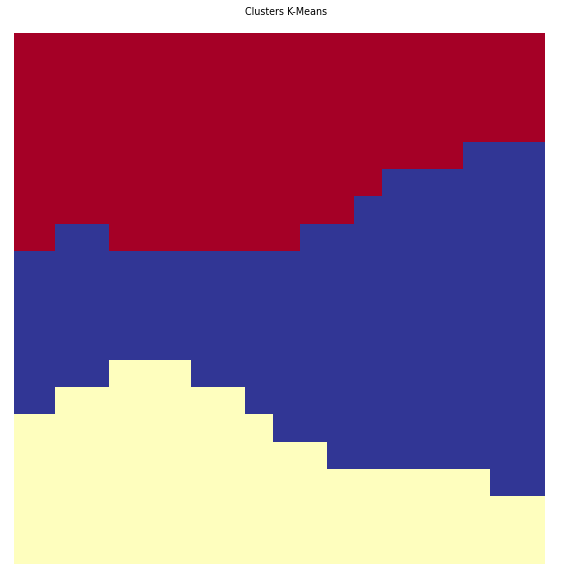

In [83]:
v = sompy.mapview.View2DPacked(width=10, height=10, title='Clusters K-Means', text_size=8) 
v.show(som, what='cluster')

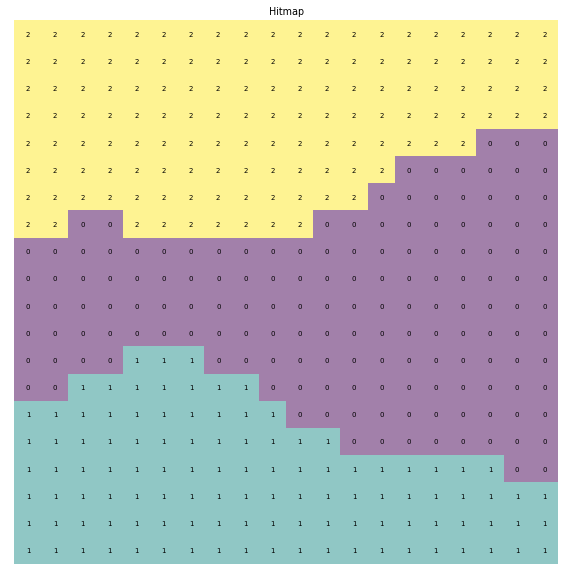

In [84]:
h = sompy.hitmap.HitMapView(10, 10, 'Hitmap', text_size=8, show_text=True)
h.show(som)

In [85]:
bmus = som.project_data(df_som_customer)
data_customer['bmu'] = bmus

In [86]:
data_customer['label'] = labels[data_customer['bmu']]
data_customer.head(10)

,Male,Longevity,Year_Birth,TypeTravel,RewardPoints,RoomType,Churn,label,bmu
0,-0.031565,0.970222,-0.164149,0.118274,-0.982321,0.201140,0.041794,1,381
1,1.703888,-2.780070,-1.638305,-1.264056,-0.556562,-0.544893,-0.072273,1,346
2,-0.258499,-0.732606,0.369983,0.515288,-0.531339,-1.182800,1.480827,0,218
3,1.829115,0.437137,-0.709931,0.669832,0.707702,0.316594,-0.774233,1,284
4,0.145185,-2.272320,-2.324787,0.312491,-0.047968,-0.314485,-0.306758,1,349
5,-0.527787,1.325904,1.282456,-0.511709,-0.110571,-0.372016,1.621244,0,116
6,0.275544,0.497641,0.285795,0.079104,0.440353,-0.152636,3.445516,0,256
7,-0.486032,-0.629640,-0.510856,0.836545,-0.721061,-1.012411,2.808803,0,219
8,0.012488,-0.063071,0.725798,0.920691,-0.899297,-0.799801,2.808841,0,218
9,-1.417530,-2.209445,0.351077,1.685335,-0.675409,0.100076,0.918112,0,139


In [87]:
df_final = data.copy(deep=True)
df_final['label'] = data_customer['label']

descr = df_final.reset_index(drop=True)
descr = descr.groupby(['label'])[['Male','Longevity','Year_Birth','TypeTravel','RewardPoints', 'RoomType', 'Churn']].describe().T
descr

label                         0            1            2
Male         count  5441.000000  4756.000000  5390.000000
             mean     -0.187240     1.174450    -0.847293
             std       0.987047     0.649414     0.705624
             min      -3.213199    -0.460545    -2.862639
             25%      -0.879164     0.680085    -1.380674
             50%      -0.158523     1.080730    -0.810772
             75%       0.521031     1.670891    -0.254022
             max       2.758556     3.664699     0.667854
Longevity    count  5441.000000  4756.000000  5390.000000
             mean      0.014872     0.057156    -0.065446
             std       1.318857     1.001342     1.047096
             min      -3.335505    -3.331588    -3.388172
             25%      -0.912422    -0.565654    -0.685723
             50%      -0.062468     0.110441     0.023530
             75%       0.997599     0.737091     0.715105
             max       3.556383     3.429747     3.221324
Year_Birth   count  5441.000000  4756.000000  5390.000000
             mean     -0.059536    -0.096038     0.144841
             std       1.077220     1.123266     0.871670
             min      -3.038629    -2.869842    -2.281136
             25%      -0.823898    -0.913647    -0.442887
             50%      -0.049751    -0.369131     0.034226
             75%       0.714253     0.596774     0.600238
             max       2.831946     3.328995     3.237272
TypeTravel   count  5441.000000  4756.000000  5390.000000
             mean     -0.026272    -0.006755     0.032481
             std       0.843498     0.849315     0.908466
             min      -2.277096    -2.306112    -2.235932
             25%      -0.509147    -0.517661    -0.623760
             50%      -0.006462     0.025715     0.072313
             75%       0.471720     0.518634     0.641337
             max       2.528901     2.532702     2.585923
RewardPoints count  5441.000000  4756.000000  5390.000000
             mean      0.004367    -0.047691     0.037673
             std       0.710076     0.644271     0.610230
             min      -2.372162    -2.152656    -1.676176
             25%      -0.487802    -0.430260    -0.416737
             50%       0.005939    -0.095611    -0.070174
             75%       0.489737     0.296715     0.443301
             max       2.785763     2.313215     2.401549
RoomType     count  5441.000000  4756.000000  5390.000000
             mean     -0.023669     0.062083    -0.030888
             std       0.708847     0.856894     0.646018
             min      -2.538080    -1.995583    -2.303690
             25%      -0.522251    -0.586171    -0.477179
             50%      -0.080551    -0.139627    -0.096926
             75%       0.416317     0.607141     0.380409
             max       3.005180     3.109242     2.438355
Churn        count  5441.000000  4756.000000  5390.000000
             mean      1.768888    -0.653250    -1.209213
             std       0.894809     0.918459     0.882076
             min      -0.874872    -2.912735    -3.299823
             25%       1.080492    -1.353864    -1.867995
             50%       1.680383    -0.610838    -1.186554
             75%       2.405779     0.037099    -0.576021
             max       4.738217     2.530091     1.524232

<h2>Exploring the Results </h2>

In [88]:
# add labels from satisfaction perspective
unscaled_data['label_sat'] = list(data_satisfaction['label'])
# add labels from customer value perspective
unscaled_data['label_cust'] = list(data_customer['label'])
unscaled_data.head()

,Cust_ID,Churn,Male,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,...,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,label_sat,label_cust
0,1,1,0,1,1974,1,0,-0.184038,3,4,...,4,3,3,3,3,4,3,4,1,1
1,2,0,1,1,1965,1,0,1.817457,1,1,...,4,5,5,5,5,1,5,2,1,1
2,3,1,1,1,1973,1,0,-0.700780,3,3,...,4,3,3,2,3,2,3,1,0,0
3,4,0,0,1,1993,0,1,-1.155980,1,1,...,5,4,4,4,4,4,4,3,0,1
4,5,0,1,1,1989,1,0,0.293787,2,2,...,5,5,5,3,4,1,3,5,1,1


In [89]:
#'Comfort','ReceptionSchedule','FoodDrink','Location','Wifi','Amenities','Staff','OnlineBooking','PriceQuality','RoomSpace','CheckOut','Checkin','Cleanliness','BarService'
centroids_satisfaction = [[-0.24042251, -0.11303799, -0.16593095, -0.01213937, -0.04028062,
        -0.58308371, -0.49574334, -0.42204004, -1.61280151, -0.37716118,
        -0.51466183, -0.52546114, -0.52451521, -0.06219455],
       [ 0.03142579,  0.07529208, -0.01714626, -0.00340762,  0.23236694,
        -0.12694721, -0.07594115, -0.01716429,  0.19580268, -0.03861965,
         0.10076807,  0.91248377,  0.10071398,  0.33556902]]

In [90]:
centroid_0_Comfort = centroids_satisfaction[0][0]
centroid_1_Comfort = centroids_satisfaction[1][0]
centroid_0_ReceptionSchedule = centroids_satisfaction[0][1]
centroid_1_ReceptionSchedule = centroids_satisfaction[1][1]
centroid_0_FoodDrink = centroids_satisfaction[0][2]
centroid_1_FoodDrink = centroids_satisfaction[1][2]
centroid_0_Location = centroids_satisfaction[0][3]
centroid_1_Location = centroids_satisfaction[1][3]
centroid_0_Wifi = centroids_satisfaction[0][4]
centroid_1_Wifi = centroids_satisfaction[1][4]
centroid_0_Amenities = centroids_satisfaction[0][5]
centroid_1_Amenities = centroids_satisfaction[1][5]
centroid_0_Staff = centroids_satisfaction[0][6]
centroid_1_Staff = centroids_satisfaction[1][6]
centroid_0_OnlineBooking = centroids_satisfaction[0][7]
centroid_1_OnlineBooking = centroids_satisfaction[1][7]
centroid_0_PriceQuality = centroids_satisfaction[0][8]
centroid_1_PriceQuality = centroids_satisfaction[1][8]
centroid_0_RoomSpace = centroids_satisfaction[0][9]
centroid_1_RoomSpace = centroids_satisfaction[1][9]
centroid_0_CheckOut = centroids_satisfaction[0][10]
centroid_1_CheckOut = centroids_satisfaction[1][10]
centroid_0_Checkin = centroids_satisfaction[0][11]
centroid_1_Checkin = centroids_satisfaction[1][11]
centroid_0_Cleanliness = centroids_satisfaction[0][12]
centroid_1_Cleanliness = centroids_satisfaction[1][12]
centroid_0_BarService = centroids_satisfaction[0][13]
centroid_1_BarService = centroids_satisfaction[1][13]

In [91]:
#'Male','Longevity','Year_Birth','TypeTravel','RewardPoints', 'RoomType', 'Churn'
centroids_customer = [[ 0.50674916, -0.18428946,  0.02273153, -0.01499813, -0.63340051,
        -0.97131609,  0.29865017],
       [ 0.56404635, -0.2773254 ,  0.33642604, -0.55480739, -0.09163078,
         0.11916693,  0.69761979],
       [ 0.33540212, -0.03103181, -0.46878502, -0.31290406,  1.03567708,
        -0.48978536,  0.2746315 ]]

In [92]:
centroid_0_Male = centroids_customer[0][0]
centroid_1_Male = centroids_customer[1][0]
centroid_2_Male = centroids_customer[2][0]
centroid_0_Longevity = centroids_customer[0][1]
centroid_1_Longevity = centroids_customer[1][1]
centroid_2_Longevity = centroids_customer[2][1]
centroid_0_Year_Birth = centroids_customer[0][2]
centroid_1_Year_Birth = centroids_customer[1][2]
centroid_2_Year_Birth = centroids_customer[2][2]
centroid_0_TypeTravel = centroids_customer[0][3]
centroid_1_TypeTravel = centroids_customer[1][3]
centroid_2_TypeTravel = centroids_customer[2][3]
centroid_0_RewardPoints = centroids_customer[0][4]
centroid_1_RewardPoints = centroids_customer[1][4]
centroid_2_RewardPoints = centroids_customer[2][4]
centroid_0_RoomType = centroids_customer[0][5]
centroid_1_RoomType = centroids_customer[1][5]
centroid_2_RoomType = centroids_customer[2][5]
centroid_0_Churn = centroids_customer[0][6]
centroid_1_Churn = centroids_customer[1][6]
centroid_2_Churn = centroids_customer[2][6]



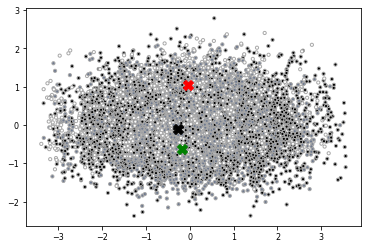

In [93]:
plt.scatter(data['Longevity'], data['RewardPoints'], c=unscaled_data.label_cust, s=10, edgecolors='darkgrey', cmap='bone')
plt.scatter(centroid_0_Longevity, centroid_0_RewardPoints, marker='X', s=100, color='green')
plt.scatter(centroid_1_Longevity, centroid_1_RewardPoints, marker='X', s=100, color='black')
plt.scatter(centroid_2_Longevity, centroid_2_RewardPoints, marker='X', s=100,color='red')
plt.show()

In [94]:
sns.countplot(y = 'BarService', hue = 'label_sat', data = data, palette='bone')

ValueError: Could not interpret input 'label_sat'

<h2>Join Clusters</h2>

In [ ]:
#descr = data.reset_index(drop=True)
#descr = descr.groupby(['label_sat', 'label_cust'])[['','','','','']].agg(['count','mean','max','min'])
#descr

KeyError: 'label_cust'

In [ ]:
data['final_label'] = data['label_sat'].astype(str) + data['label_cust'].astype(str)
data.head()

NameError: name 'data' is not defined